In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plot_df = pd.read_pickle("cleaned_plots_updated.pkl")

In [2]:
movie_df = pd.DataFrame(columns=['title','title_id/book_isbn','genres','release_date','plot/book_desc','year_of_release','author/director','isBook','isMovie'])

In [3]:
movie_df['title']=plot_df['title']
movie_df['title_id/book_isbn'] = plot_df['title_id']
movie_df['genres'] = plot_df['genres']
movie_df['release_date'] = plot_df['release_date']
movie_df['plot/book_desc'] = plot_df['plot']
movie_df['year_of_release'] = plot_df['year_of_release']
movie_df['author/director'] = plot_df['director']
movie_df['isBook'] = 0
movie_df['isMovie'] = 1

#### Explore movie plots

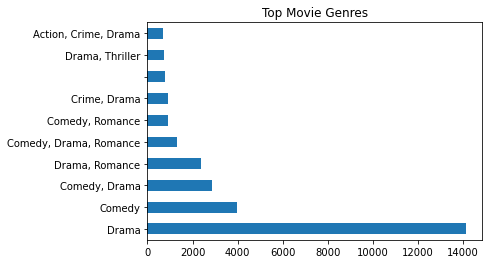

In [4]:
plt.title('Top Movie Genres')
plot_df.genres.value_counts().sort_values()[::-1][:10].plot(kind='barh');

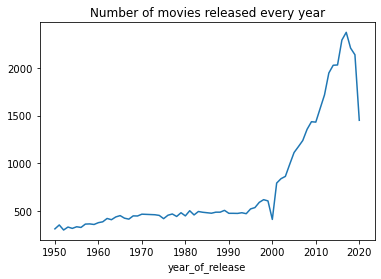

In [5]:
plot_df.groupby('year_of_release')['title'].count().plot(title="Number of movies released every year");

## Find point where plots start to get shorter for movie

In [6]:
plot_len_list = []
for line in movie_df['plot/book_desc']:
    #print(line.split(" "))
    plot_len_list.append(len(line.split(" ")))

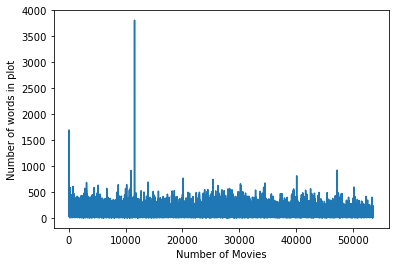

In [7]:
import numpy as np
sns.lineplot(x=np.arange(0,len(plot_len_list)), y=plot_len_list)
plt.xlabel('Number of Movies')
plt.ylabel('Number of words in plot')
plt.show();

In [8]:
plot_df

,title,title_id,genres,release_date,plot,year_of_release,director
0,Summer Stock,tt0043012,"Musical, Romance",31 August 1950,"As a favor to her actress sister Abigail, New ...",1950,Charles Walters
1,In a Lonely Place,tt0042593,"Drama, Film-Noir, Mystery",17 May 1950,Dixon Steele is a Hollywood screenwriter who h...,1950,Nicholas Ray
2,Sunset Blvd.,tt0043014,"Drama, Film-Noir",10 August 1950,Joe Gillis is a struggling hack B-movie Hollyw...,1950,Billy Wilder
3,Cinderella,tt0042332,"Animation, Family, Fantasy",15 February 1950,"In a far away, long ago kingdom, Cinderella is...",1950,"Clyde Geronimi, Wilfred Jackson, Hamilton Luske"
4,All About Eve,tt0042192,Drama,13 October 1950,Stage star Margo Channing is friend to playwri...,1950,Joseph L. Mankiewicz
...,...,...,...,...,...,...,...
53594,Kiwewe Nyeusi (Black Trauma),tt12798962,Drama,6 July 2020,Kiwewe Nyeusi is Swahili for the words Black T...,2020,Kashmir Leese
53595,Who Laughs in Hell,tt12007548,"Comedy, Drama, Thriller",25 March 2020,"King (Liam Bilsky) is an extremely hostile, mo...",2020,Liam Bilsky
53596,Who Laughs in Hell,tt12007548,"Comedy, Drama, Thriller",25 March 2020,"King (Liam Bilsky) is an extremely hostile, mo...",2020,Liam Bilsky
53597,Gully Gang,tt13369990,Comedy,9 October 2020,"A man named Malli, who was already in love wit...",2020,Vinay Tambireddy


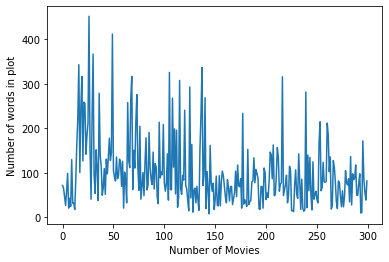

In [9]:
import numpy as np
ax = sns.lineplot(x=np.arange(0,300), y=plot_len_list[300:600])
plt.xlabel('Number of Movies')
plt.ylabel('Number of words in plot')
plt.show();

In [10]:
import numpy as np
count = 0
for i in plot_len_list:
    if i < 30:
        count+=1

In [11]:
count

10692

In [12]:
for ix,line in enumerate(movie_df['plot/book_desc']):
    if len(line.split(" ")) < 30:
          movie_df.drop(ix,inplace=True)

In [13]:
movie_df.reset_index(drop=True,inplace=True)

### Explore book genres

In [14]:
book_df = pd.read_pickle('book_info.pkl')

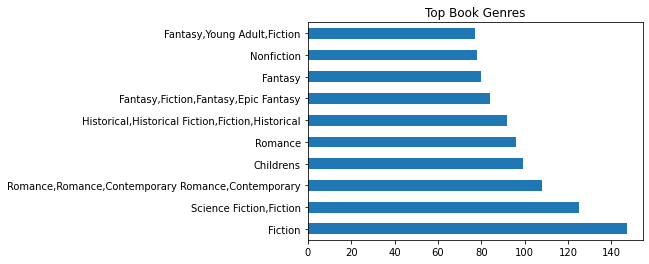

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
book_df.genres.value_counts().sort_values()
top_genres = book_df[::-1][:10]
top_genres
plt.title('Top Book Genres')
book_df.genres.value_counts().sort_values()[::-1][:10].plot(kind='barh');

* Book and movie genres are not one to one meaning that they differ in titles so may prove to be unuseful in building the recommender system

## Find point where plots start to get shorter for books

In [36]:
plot_len_list = []
for line in book_df['plot/book_desc']:
    #print(line.split(" "))
    plot_len_list.append(len(line.split(" ")))

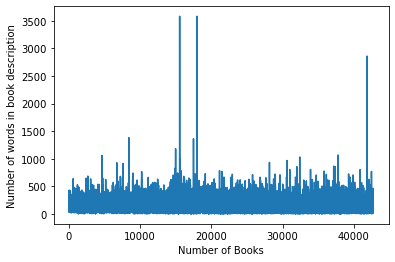

In [37]:
sns.lineplot(x=np.arange(0,len(plot_len_list)), y=plot_len_list)
plt.xlabel('Number of Books')
plt.ylabel('Number of words in book description')
plt.show();

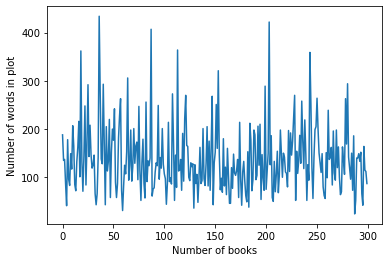

In [38]:
import numpy as np
sns.lineplot(x=np.arange(0,300), y=plot_len_list[0:300])
plt.xlabel('Number of books')
plt.ylabel('Number of words in plot')
plt.show();

In [20]:
import numpy as np
count = 0
for i in plot_len_list:
    if i < 30:
        count+=1

In [21]:
count

1647

In [22]:
book_df.reset_index(drop=True,inplace=True)

In [23]:
for ix,line in enumerate(book_df['plot/book_desc']):
    if len(line.split(" ")) < 30:
          book_df.drop(ix,inplace=True)

In [24]:
book_df.reset_index(drop=True,inplace=True)

## Create a sample set of the data for the initial recommender system
* Will take top 1000 book and top 50 per year for each year total in 3500 movies

In [25]:
top_book_df = book_df.iloc[:1000]

In [26]:
def get_top_movies(df,num):
    '''
    Function to get the top movies per year
    df: dataframe to be passed in
    num: number of top movies to get
    '''
    dfs=[]
    for i in range(1950,2021):
        df = movie_df[movie_df['year_of_release']==i].iloc[:num]
        dfs.append(df)
    return dfs

In [27]:
dfs = get_top_movies(movie_df,50)

In [28]:
book_movie_df = pd.DataFrame(columns=['title','title_id/book_isbn','genres','release_date','plot/book_desc','year_of_release','author/director','isBook','isMovie'])

In [29]:
book_movie_df = book_movie_df.append(dfs,ignore_index = True)

In [30]:
book_movie_df

,title,title_id/book_isbn,genres,release_date,plot/book_desc,year_of_release,author/director,isBook,isMovie
0,Summer Stock,tt0043012,"Musical, Romance",31 August 1950,"As a favor to her actress sister Abigail, New ...",1950,Charles Walters,0,1
1,In a Lonely Place,tt0042593,"Drama, Film-Noir, Mystery",17 May 1950,Dixon Steele is a Hollywood screenwriter who h...,1950,Nicholas Ray,0,1
2,Sunset Blvd.,tt0043014,"Drama, Film-Noir",10 August 1950,Joe Gillis is a struggling hack B-movie Hollyw...,1950,Billy Wilder,0,1
3,Cinderella,tt0042332,"Animation, Family, Fantasy",15 February 1950,"In a far away, long ago kingdom, Cinderella is...",1950,"Clyde Geronimi, Wilfred Jackson, Hamilton Luske",0,1
4,All About Eve,tt0042192,Drama,13 October 1950,Stage star Margo Channing is friend to playwri...,1950,Joseph L. Mankiewicz,0,1
...,...,...,...,...,...,...,...,...,...
3545,The Father,tt10272386,Drama,27 January 2020,A man refuses all assistance from his daughter...,2020,Florian Zeller,0,1
3546,Summer of 85,tt10457128,Drama,2 July 2020,What do you dream of when you're 16 years old ...,2020,François Ozon,0,1
3547,Last Call,tt12961718,"Comedy, Romance",22 August 2020,A girl must be saved from committing suicide t...,2020,"Ivaylo Penchev, Radoslav Iliev",0,1
3548,Wander Darkly,tt8902978,Drama,25 January 2020,New parents Adrienne and Matteo are forced to ...,2020,Tara Miele,0,1


In [31]:
book_movie_df = book_movie_df.append(top_book_df,ignore_index = True)

In [32]:
book_movie_df

,title,title_id/book_isbn,genres,release_date,plot/book_desc,year_of_release,author/director,isBook,isMovie,book/movie
0,Summer Stock,tt0043012,"Musical, Romance",31 August 1950,"As a favor to her actress sister Abigail, New ...",1950,Charles Walters,0,1,NaN
1,In a Lonely Place,tt0042593,"Drama, Film-Noir, Mystery",17 May 1950,Dixon Steele is a Hollywood screenwriter who h...,1950,Nicholas Ray,0,1,NaN
2,Sunset Blvd.,tt0043014,"Drama, Film-Noir",10 August 1950,Joe Gillis is a struggling hack B-movie Hollyw...,1950,Billy Wilder,0,1,NaN
3,Cinderella,tt0042332,"Animation, Family, Fantasy",15 February 1950,"In a far away, long ago kingdom, Cinderella is...",1950,"Clyde Geronimi, Wilfred Jackson, Hamilton Luske",0,1,NaN
4,All About Eve,tt0042192,Drama,13 October 1950,Stage star Margo Channing is friend to playwri...,1950,Joseph L. Mankiewicz,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
4545,archer's voice,NaN,"Romance,New Adult,Contemporary,Romance,Contemp...",NaN,"A New York Times, USA Today, and Wall Street J...",NaN,Mia Sheridan,1,0,NaN
4546,the complete anne of green gables boxed set,76783609419,"Classics,Fiction,Young Adult,Childrens,Histori...",NaN,"Favorites for nearly 100 years, these classic ...",NaN,L.M. Montgomery,1,0,NaN
4547,the complete persepolis,9.78038E+12,"Sequential Art,Graphic Novels,Sequential Art,C...",NaN,"Here, in one volume: Marjane Satrapi's best-se...",NaN,"Marjane Satrapi,Mattias Ripa,Blake Ferris,Anja...",1,0,NaN
4548,the man in the high castle,9.78068E+12,"Science Fiction,Fiction,Science Fiction,Altern...",NaN,It's America in 1962. Slavery is legal once ag...,NaN,Philip K. Dick,1,0,NaN


In [ ]:
book_movie_df.to_pickle('sample_book_movie_df.pkl')

### Get a larger sample of the data to run through the reccommender systems and see how it does
* Right now the sample has the top 50 movies from every year and the top 50 books
* I will get the top 200 movies from every year and the top 2000 books to see how well the reccommender performs

In [33]:
top_dfs = get_top_movies(movie_df,200)

In [34]:
top_dfs[70]

,title,title_id/book_isbn,genres,release_date,plot/book_desc,year_of_release,author/director,isBook,isMovie
245,Pehla Aadmi,tt0267821,"Drama, History",17 August 2020,"In WWII, a man leaves his bride to be and answ...",2020,Bimal Roy,0,1
4130,Haqeeqat,tt0154565,"Action, Musical, War",17 August 2020,"In July, 1962, China's Red Army started their ...",2020,Chetan Anand,0,1
41034,Thin Skin,tt10374618,Drama,11 August 2020,Ahamefule Joe Oluo's days are spent at a soul-...,2020,Charles Mudede,0,1
41847,The Trial of the Chicago 7,tt1070874,"Drama, History, Thriller",25 September 2020,"In Chicago 1968, the Democratic Party Conventi...",2020,Aaron Sorkin,0,1
41848,Love and Monsters,tt2222042,"Action, Adventure, Comedy",2020,"It's the end of the world as we know it, and, ...",2020,Michael Matthews,0,1
...,...,...,...,...,...,...,...,...,...
42039,Orey Bujjigaa,tt11854074,Drama,1 October 2020,"A boy and a girl, each facing their upcoming a...",2020,Vijay Kumar Konda,0,1
42040,My lake,tt7095820,Drama,10 September 2020,"MY LAKE, or ""my movie"", although it is a cinem...",2020,Gjergj Xhuvani,0,1
42041,American Wisper,tt7765778,"Crime, Thriller",12 February 2020,'Wisper' is the true of the murder of a middle...,2020,Russ Emanuel,0,1
42042,A Perfect Enemy,tt9421200,Thriller,2020,Successful architect Jeremiasz Angust is appro...,2020,Kiké Maíllo,0,1


In [35]:
top_2000_books = book_df.iloc[:2000]

In [36]:
book_movie_df2 = pd.DataFrame(columns=['title','title_id/book_isbn','genres','release_date','plot/book_desc','year_of_release','author/director','isBook','isMovie'])

In [37]:
book_movie_df2 = book_movie_df2.append(top_dfs,ignore_index = True)

In [38]:
book_movie_df2 = book_movie_df2.append(top_2000_books,ignore_index = True)

In [ ]:
book_movie_df2.to_pickle('sample_data2.pkl')

In [39]:
book_movie_df2.to_csv('book_movie.csv')